In [ ]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
import warnings

warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")

pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as pdr
import datetime
import yfinance as yf

Import stock's data


In [ ]:
pdr.get_data_yahoo = pdr.get_data_yahoo
start=datetime.datetime(2010,1,1)
end=datetime.datetime(2019,1,1)
tickers = [
    "AAPL", "MSFT", "AMZN", "GOOGL", "GOOG", "META", "TSLA", "NVDA", "PEP", "COST",
    "AVGO", "ADBE", "CSCO", "NFLX", "INTC", "QCOM", "TXN", "AMD", "SBUX", "AMAT",
    "INTU", "CHTR", "ADI", "LULU", "BKNG", "MU", "ASML", "ADP", "PYPL", "MDLZ",
    "ORLY", "TMUS", "GILD", "CSX", "REGN", "VRTX", "ROST", "PDD", "MRNA", "KLAC",
    "LRCX", "MRVL", "CPRT", "DXCM", "XEL", "SGEN", "VRSK", "CDNS", "SNPS", "ODFL",
    "DDOG", "CRWD", "TEAM", "WDAY", "SPLK", "OKTA", "ZM", "DOCU", "PTON", "ZS",
    "TTD", "PAYX", "CSGP", "WBD", "ABNB", "ARM", "GEHC", "ON", "BKR", "FANG",
    "DASH", "GFS", "HON", "IDXX", "LIN", "MCHP", "MDB", "MNST", "NXPI", "PLTR",
    "PANW", "ROP", "TTWO", "TXN", "VRSK", "WBD", "WDAY", "XEL", "ZM", "ZS"
]

data=yf.download(tickers,start,end)['Close']
data.dropna(axis=1,how='any',inplace=True)
data.tail()


[*********************100%***********************]  83 of 83 completed
ERROR:yfinance:
12 Failed downloads:
ERROR:yfinance:['ARM', 'DDOG', 'ABNB', 'GEHC', 'GFS', 'PTON', 'CRWD', 'PLTR', 'ZM', 'DASH']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2010-01-01 00:00:00 -> 2019-01-01 00:00:00) (Yahoo error = "Data doesn\'t exist for startDate = 1262322000, endDate = 1546318800")')
ERROR:yfinance:['SPLK', 'SGEN']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Ticker,AAPL,ADBE,ADI,ADP,AMAT,AMD,AMZN,ASML,AVGO,BKNG,...,ROST,SBUX,SNPS,TMUS,TTWO,TXN,VRSK,VRTX,WBD,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-24,36.707500,205.160004,80.419998,121.949997,28.990000,16.650000,67.197998,145.009995,23.379999,1616.829956,...,76.300003,60.560001,79.239998,60.799999,98.760002,87.800003,103.040001,151.910004,24.469999,48.599998
2018-12-26,39.292500,222.949997,84.339996,127.699997,30.639999,17.900000,73.544998,152.919998,24.813999,1703.250000,...,81.790001,63.080002,82.790001,63.009998,104.629997,92.980003,107.489998,161.839996,25.549999,49.560001
2018-12-27,39.037498,225.139999,85.360001,129.729996,31.549999,17.490000,73.082001,154.389999,25.084999,1717.800049,...,81.839996,63.200001,83.239998,62.650002,106.150002,93.809998,109.169998,162.369995,24.780001,49.599998
2018-12-28,39.057499,223.130005,85.459999,129.229996,32.380001,17.820000,73.901001,155.089996,25.358999,1715.829956,...,81.580002,63.389999,83.639999,63.240002,104.570000,93.809998,108.059998,161.419998,24.639999,49.250000
2018-12-31,39.435001,226.240005,85.830002,131.119995,32.740002,18.459999,75.098503,155.619995,25.427999,1722.420044,...,83.199997,64.400002,84.239998,63.610001,102.940002,94.500000,109.040001,165.710007,24.740000,49.270000


Finding the cointegerated pairs

In [ ]:
def find_pairs(data,threshold=0.02):
  n=data.shape[1]
  score_matrix = np.zeros((n, n))
  pvalue_matrix = np.ones((n, n))
  keys = data.keys()
  pairs = []
  for i in range(0,n):
    for  j in range(i+1,n):
      S1 = data[keys[i]]
      S2 = data[keys[j]]

      result = coint(S1,S2)
      score = result[0]
      pvalue = result[1]
      score_matrix[i,j] = score
      pvalue_matrix[i,j] = pvalue
      if(pvalue<threshold):
        pairs.append((keys[i],keys[j]))
  return score_matrix,pvalue_matrix,pairs




[('AAPL', 'ODFL'), ('ADBE', 'CSCO'), ('ADBE', 'INTU'), ('ADBE', 'MSFT'), ('ADI', 'BKNG'), ('ADI', 'GOOG'), ('ADI', 'GOOGL'), ('ADI', 'HON'), ('ADI', 'ODFL'), ('ADI', 'SNPS'), ('ADP', 'COST'), ('ADP', 'ROP'), ('AMAT', 'MCHP'), ('ASML', 'ODFL'), ('AVGO', 'TMUS'), ('AVGO', 'XEL'), ('BKNG', 'HON'), ('BKNG', 'KLAC'), ('CDNS', 'SNPS'), ('COST', 'PAYX'), ('COST', 'ROST'), ('COST', 'VRSK'), ('CPRT', 'NFLX'), ('CSGP', 'ODFL'), ('DXCM', 'ORLY'), ('GOOG', 'HON'), ('GOOG', 'PAYX'), ('GOOGL', 'HON'), ('GOOGL', 'PAYX'), ('HON', 'PAYX'), ('INTC', 'INTU'), ('INTC', 'ODFL'), ('INTU', 'MSFT'), ('LRCX', 'MCHP'), ('MDLZ', 'MNST'), ('PAYX', 'ROST'), ('PAYX', 'XEL'), ('ROP', 'VRTX'), ('ROST', 'VRSK'), ('SNPS', 'TXN')]


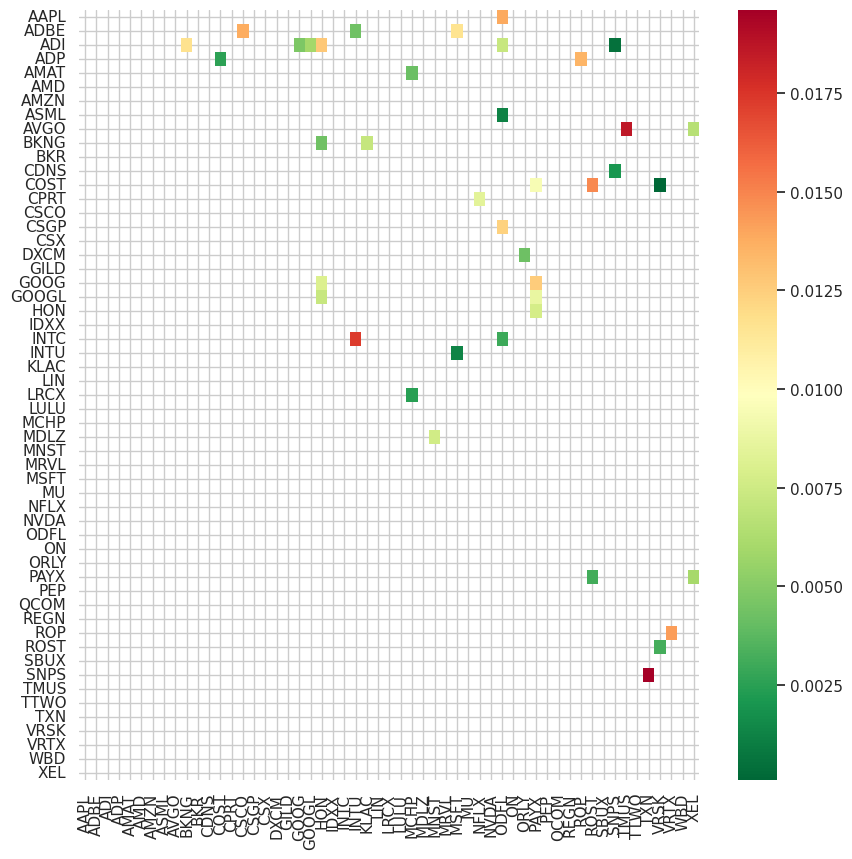

In [ ]:
scores, pvalues, pairs = find_pairs(data)
import seaborn
fig, ax = plt.subplots(figsize=(10,10))
seaborn.heatmap(pvalues, xticklabels=data.columns, yticklabels=data.columns, cmap='RdYlGn_r'
                , mask = (pvalues >= 0.02)
                )
print(pairs)

In [ ]:
price_ratios=[]
for pair in pairs:
  price_ratio=data[pair[0]]/data[pair[1]]
  price_ratios.append(price_ratio)



Modelling the relationship's between stock's using a kalman filter

In [ ]:
!pip install pykalman

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 6.1 MB/s eta 0:00:00


In [ ]:
from pykalman import KalmanFilter

def KalmanFilterAverage(x):
    # Creating a Kalman Filter
    kf = KalmanFilter(transition_matrices=[1],
                      observation_matrices=[1],
                      initial_state_mean=0,
                      initial_state_covariance=1,
                      observation_covariance=1,
                      transition_covariance=.01)

    # Getting a rolling mean
    state_means, _ = kf.filter(x.values)
    state_means = pd.Series(state_means.flatten(), index=x.index)
    return state_means

def Kalman_regression(x, y):
    delta = 1e-3


    trans_cov = delta / (1 - delta) * np.eye(2)  # How much random walk wiggles
    # Using x_data instead of x for vstack
    obs_mat = np.expand_dims(np.vstack([[x], [np.ones(len(x))]]).T, axis=1)

    kf = KalmanFilter(n_dim_obs=1, n_dim_state=2,  # y is 1-dimensional, (alpha, beta) is 2-dimensional
                      initial_state_mean=[0, 0],
                      initial_state_covariance=np.ones((2, 2)),
                      transition_matrices=np.eye(2),
                      observation_matrices=obs_mat,
                      observation_covariance=2,
                      transition_covariance=trans_cov)

    # Use the observations y to get running estimates and errors for the state parameters
    state_means, state_covs = kf.filter(y.values) # Using y_data instead of y.values

    return state_means

def half_life(spread):
    spread_lag = spread.shift(1)
    spread_lag.iloc[0] = spread_lag.iloc[1]

    spread_ret = spread - spread_lag
    spread_ret.iloc[0] = spread_ret.iloc[1]

    spread_lag2 = sm.add_constant(spread_lag)

    model = sm.OLS(spread_ret, spread_lag2)
    res = model.fit()
    halflife = int(round(-np.log(2) / res.params[1], 0))
    return halflife

Calculating hedge ratio's

In [ ]:
for pair in pairs:
  print(f'The hedge ratios are{Kalman_regression(data[pair[0]],data[pair[1]])[0]}')



The hedge ratios are[0.48895212 0.48895212]
The hedge ratios are[0.64730932 0.64730932]
The hedge ratios are[0.8077602 0.8077602]
The hedge ratios are[0.81143068 0.81143068]
The hedge ratios are[6.84239751 6.84239751]
The hedge ratios are[0.47692203 0.47692203]
The hedge ratios are[0.47918882 0.47918882]
The hedge ratios are[1.17528348 1.17528348]
The hedge ratios are[0.13257249 0.13257249]
The hedge ratios are[0.68558403 0.68558403]
The hedge ratios are[1.53693043 1.53693043]
The hedge ratios are[1.35920428 1.35920428]
The hedge ratios are[0.94551654 0.94551654]
The hedge ratios are[0.12149313 0.12149313]
The hedge ratios are[4.45375702 4.45375702]
The hedge ratios are[5.88991218 5.88991218]
The hedge ratios are[0.17099457 0.17099457]
The hedge ratios are[0.16411157 0.16411157]
The hedge ratios are[3.03206425 3.03206425]
The hedge ratios are[0.50990098 0.50990098]
The hedge ratios are[0.176571 0.176571]
The hedge ratios are[0.49385285 0.49385285]
The hedge ratios are[1.96593297 1.9659

In [ ]:
p_values=[]
for pair in pairs:
   p_value=coint(data[pair[0]],data[pair[1]])[1]
   p_values.append((pair,p_value))
p_values.sort(key=lambda item:item[1])
print(p_values)

[(('COST', 'VRSK'), 0.00010818506891460695), (('ADI', 'SNPS'), 0.0005516110947366128), (('ASML', 'ODFL'), 0.0011894797085790828), (('INTU', 'MSFT'), 0.0013158780871415686), (('CDNS', 'SNPS'), 0.0020577397908091172), (('LRCX', 'MCHP'), 0.002446257525202713), (('ADP', 'COST'), 0.002603031262685656), (('INTC', 'ODFL'), 0.003001739093400814), (('PAYX', 'ROST'), 0.0031386357765115346), (('ROST', 'VRSK'), 0.0031826505129655173), (('AMAT', 'MCHP'), 0.004192889658703132), (('DXCM', 'ORLY'), 0.004279089380089272), (('ADBE', 'INTU'), 0.004342647473404803), (('BKNG', 'HON'), 0.004356878814400566), (('ADI', 'GOOG'), 0.004746054259274171), (('ADI', 'GOOGL'), 0.005969120297587791), (('PAYX', 'XEL'), 0.005988347694529304), (('AVGO', 'XEL'), 0.006598124773874253), (('BKNG', 'KLAC'), 0.007132632593098518), (('ADI', 'ODFL'), 0.007254568353290724), (('GOOGL', 'HON'), 0.007257434093323402), (('MDLZ', 'MNST'), 0.0076081081758232185), (('HON', 'PAYX'), 0.007745040020601681), (('GOOG', 'HON'), 0.008107063388

Creating different kind of portfolios


In [ ]:
#This only contains the most cointegerated pair
port1=p_values[0][0]


#This contains the top 5 cointegerated pairs
p_values = np.array(p_values, dtype=[('pair', 'O'), ('p_value', 'f8')])
top5=p_values[:5]
port2=top5['pair']
print(port2)

#This contains the bottom 5 cointegerated pairs
port3=p_values[-5:]['pair']






[('COST', 'VRSK') ('ADI', 'SNPS') ('ASML', 'ODFL') ('INTU', 'MSFT')
 ('CDNS', 'SNPS')]


Backtest function to test a pair of stocks


In [ ]:
def pair_trade(x, y, i, capital, transaction_cost=0.01):
    data_1 = pd.DataFrame({'y': y, 'x': x})
    state_means = Kalman_regression(KalmanFilterAverage(x), KalmanFilterAverage(y))
    data_1['hedge_ratio'] = -state_means[:, 0]
    data_1['spread'] = data_1.y + (data_1.x * data_1.hedge_ratio)
    halflife = half_life(data_1['spread'])
    meanspread = data_1.spread.rolling(window=halflife).mean()
    stdspread = data_1.spread.rolling(window=halflife).std()
    data_1['z_score_spread'] = (data_1.spread - meanspread) / stdspread

    totalmoney = 0
    trade_score = i
    exitscore = 0
    # for long trades
    data_1['long_entry'] = ((data_1.z_score_spread < -(transaction_cost + trade_score)) & (data_1.z_score_spread.shift(1) > -(transaction_cost + trade_score)))
    data_1['long_exit'] = ((data_1.z_score_spread > -(transaction_cost + exitscore)) & (data_1.z_score_spread.shift(1) < -(transaction_cost + exitscore)))
    data_1['total_long'] = np.nan
    data_1.loc[data_1.long_entry, 'total_long'] = 1
    data_1.loc[data_1.long_exit, 'total_long'] = 0
    data_1['total_long'][0] = 0
    data_1['total_long'] = data_1['total_long'].fillna(method='pad')

    # for short trades
    data_1['short_entry'] = ((data_1.z_score_spread > (trade_score - transaction_cost)))
    data_1['short_exit'] = ((data_1.z_score_spread < (exitscore - transaction_cost)))
    data_1.loc[data_1['short_entry'], 'total_short'] = -1
    data_1.loc[data_1['short_exit'], 'total_short'] = 0
    data_1['total_short'][0] = 0
    data_1['total_short'] = data_1['total_short'].fillna(method='pad')

    data_1['units'] = data_1['total_long'] + data_1['total_short']

    # Capital constraint
    data_1['units'] = np.where(
        (abs(data_1['units'] * data_1.y) + abs(data_1['units'] * data_1.x)) > capital,
        0,  # Set units to 0 if total investment exceeds capital
        data_1['units']
    )

    totalmoney = data_1['total_short'] * data_1.y - data_1['total_long'] * data_1.x
    data_1['spread_change'] = data_1['spread'] - data_1['spread'].shift(1) / data_1.y + (data_1.x * data_1.hedge_ratio)
    data_1['returns'] = data_1['spread_change'] * data_1['units'].shift(1)
    data_1['returns'] = data_1['returns'] - abs(data_1['units'].diff()) * transaction_cost
    data_1['cum_returns'] = data_1['returns'].cumsum()
    data_1['cum_returns'] = data_1.cum_returns + 1
    return data_1['cum_returns']

Function to find the ideal trade score to enter a trade for two stocks



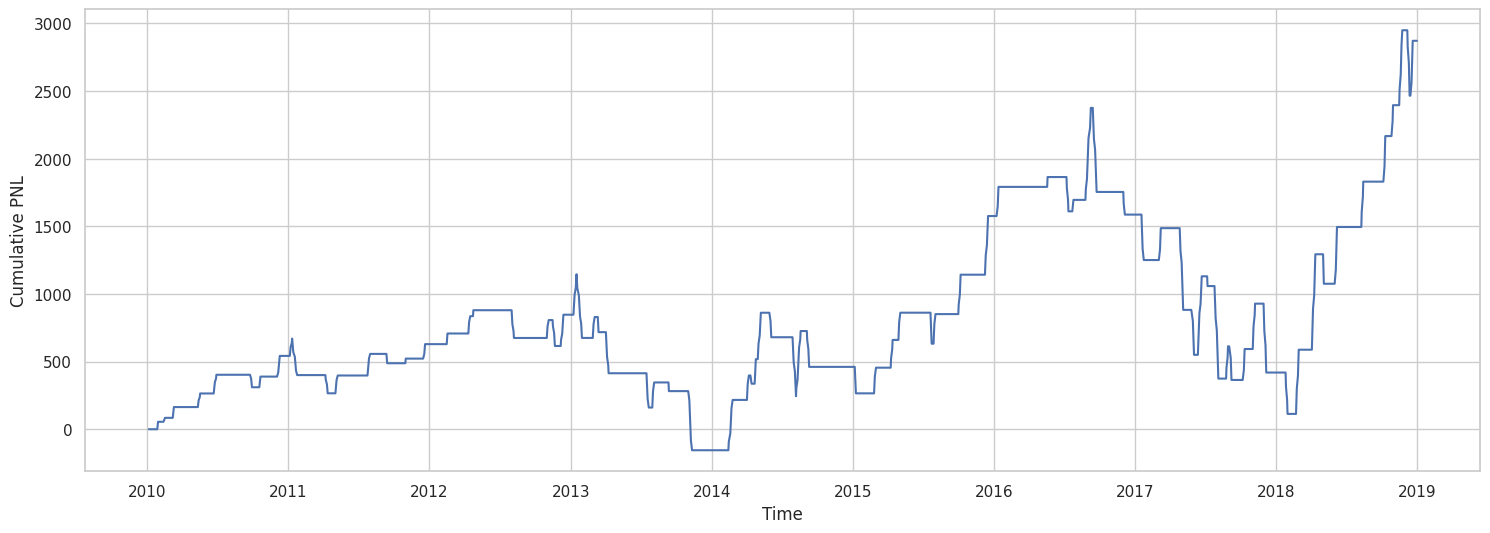

In [ ]:
def find_tradescore(x,y,capital):
  profits=[]
  for i in np.arange(0.2,2,0.1):
      netpnl=pair_trade(x,y,i,capital)
      profits.append((i,netpnl[-1]))
  profits.sort(key=lambda item:item[1],reverse=True)
  best_trade_score,best_profit =profits[0]


  return best_trade_score,best_profit
plt.figure(figsize=(18,6))
best_trade_score,best_profit=find_tradescore(data[port1[0]],data[port1[1]],1e5)
plt.plot(pair_trade(data[port1[0]],data[port1[1]],best_trade_score,1e5),label='Cumulative PNL')
plt.xlabel('Time')
plt.ylabel('Cumulative PNL')
plt.show()





function to allocate capital to a stock pair


In [ ]:
def position_sizing(spread, risk_factor=0.10):  # Increased risk factor to 0.10
    # Convert spread to pandas Series if it's numpy ndarray
    spread = pd.Series(spread)

    # Compute the volatility of the spread (Rolling Standard Deviation)
    spread_volatility = spread.rolling(window=30).std()

    # Calculate position size based on risk factor and volatility
    position_size = risk_factor / spread_volatility
    position_size = position_size.fillna(0)


    return position_size.mean()
def calc_capital(portfolio,total_capital,risk_factor=0.10):
  capital_allocation=pd.DataFrame({'pairs':portfolio})
  capital=[]

  for pair in portfolio:

     stock1_price=data[pair[0]].values
     stock2_price=data[pair[1]].values
     capital_allocate=pd.DataFrame({'stock1_price':stock1_price,'stock2_price':stock2_price})
     capital_allocate['spread']=capital_allocate['stock1_price']-capital_allocate['stock2_price']

     c=total_capital*position_sizing(capital_allocate['spread'],risk_factor)
     capital.append(c)
  capital_allocation['capital']=capital
  capital_sum=capital_allocation.capital.sum()
  t=total_capital/capital_sum
  capital_allocation.capital=capital_allocation.capital*t

  return capital_allocation


Calculating the profit for each portfolio and then comparing them


---



In [ ]:
from functools import reduce
capital_allocation1=calc_capital(port2,1e5)
capital_allocation2=calc_capital(port3,1e5)

def backtest_portfolio(capital_allocation):
  cumulative_profit=[]
  for pair in capital_allocation.pairs:
     index = capital_allocation.index[capital_allocation['pairs'] == pair][0]
     t,profits=find_tradescore(data[pair[0]],data[pair[1]],capital_allocation.capital.iloc[index])
     cumulative_profit.append(pair_trade(data[pair[0]],data[pair[1]],1,capital_allocation.capital.iloc[index]))

  return cumulative_profit


total_cumulative_profit= reduce(lambda x, y: x.add(y, fill_value=0),backtest_portfolio(capital_allocation1))
print(total_cumulative_profit)


Date
2010-01-04            NaN
2010-01-05       5.000000
2010-01-06       5.000000
2010-01-07       5.000000
2010-01-08       5.000000
                 ...     
2018-12-24    5599.338261
2018-12-26    5355.330139
2018-12-27    5064.583175
2018-12-28    4773.961543
2018-12-31    4483.410691
Name: cum_returns, Length: 2264, dtype: float64


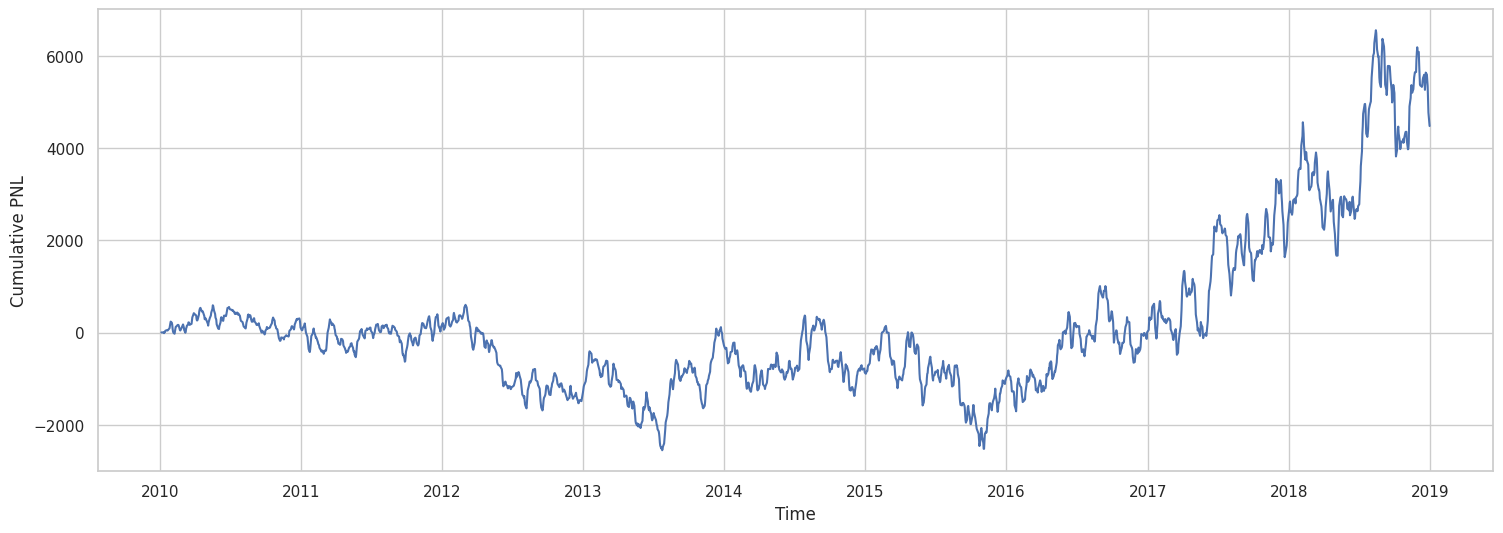

In [ ]:
plt.figure(figsize=(18,6))

plt.plot(total_cumulative_profit,label='Cumulative PNL')
plt.xlabel('Time')
plt.ylabel('Cumulative PNL')
plt.show()


[Date
2010-01-04            NaN
2010-01-05       1.000000
2010-01-06       1.000000
2010-01-07       1.000000
2010-01-08       1.000000
                 ...     
2018-12-24   -8227.326328
2018-12-26   -8227.336328
2018-12-27   -8068.119431
2018-12-28   -7909.478287
2018-12-31   -7909.478287
Name: cum_returns, Length: 2264, dtype: float64, Date
2010-01-04            NaN
2010-01-05       1.000000
2010-01-06       1.000000
2010-01-07       1.000000
2010-01-08       1.000000
                 ...     
2018-12-24   -2279.631383
2018-12-26   -2208.792301
2018-12-27   -2135.292513
2018-12-28   -2060.192337
2018-12-31   -2060.192337
Name: cum_returns, Length: 2264, dtype: float64, Date
2010-01-04            NaN
2010-01-05       1.000000
2010-01-06       1.000000
2010-01-07       1.000000
2010-01-08       1.000000
                 ...     
2018-12-24     753.396294
2018-12-26     753.396294
2018-12-27     753.386294
2018-12-28     950.375211
2018-12-31    1147.283933
Name: cum_returns, Length: 2

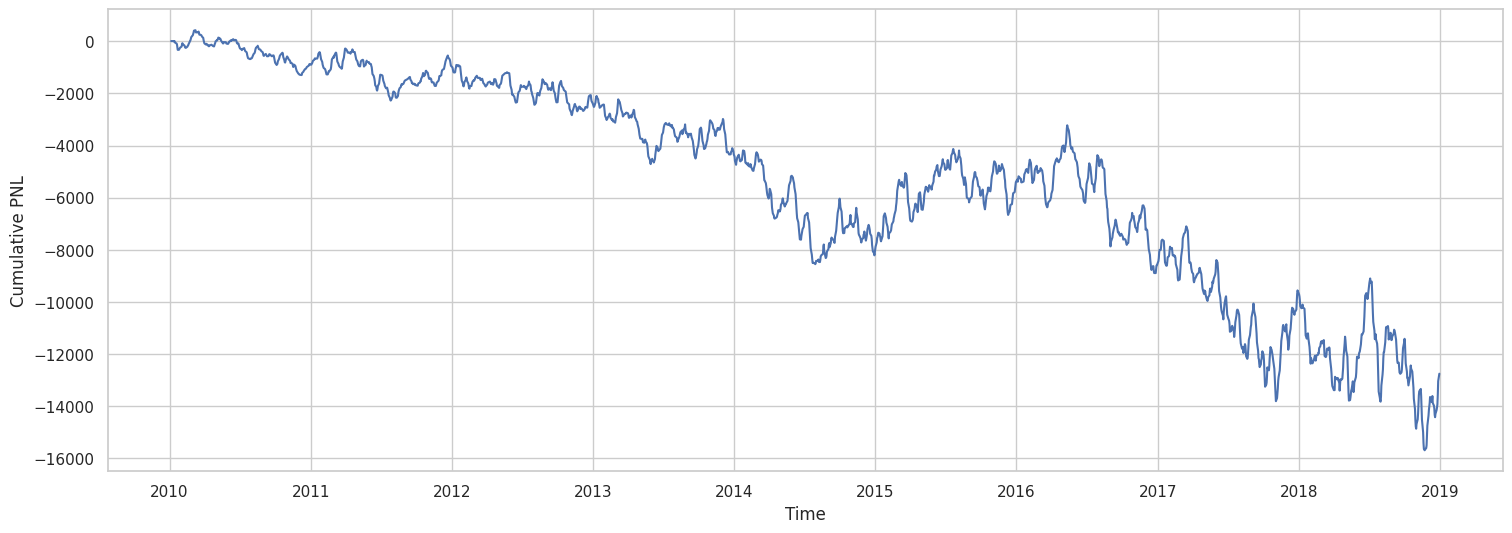

In [ ]:
plt.figure(figsize=(18,6))
print(backtest_portfolio(capital_allocation2))
total_cumulative_profit2= reduce(lambda x, y: x.add(y, fill_value=0),backtest_portfolio(capital_allocation2))
plt.plot(total_cumulative_profit2,label='Cumulative PNL')
plt.xlabel('Time')
plt.ylabel('Cumulative PNL')
plt.show()


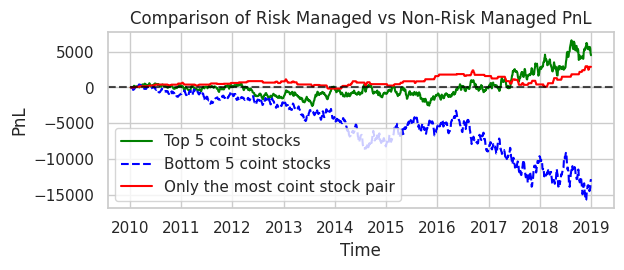

In [ ]:
plt.subplot(2, 1, 2)
plt.plot(total_cumulative_profit, label="Top 5 coint stocks", color="green")
plt.plot(total_cumulative_profit2, label="Bottom 5 coint stocks ", color="blue", linestyle="--")
plt.plot(pair_trade(data[port1[0]],data[port1[1]],best_trade_score,1e5),label='Only the most coint stock pair',color='red')
plt.axhline(0, color="black", linestyle="--", alpha=0.7)
plt.title("Comparison of Risk Managed vs Non-Risk Managed PnL")
plt.xlabel("Time")
plt.ylabel("PnL")
plt.legend()
plt.tight_layout()
plt.show()

Testing the portfolio with Risk Management techniques and without risk management techniques


In [37]:
def stop_loss(spread, threshold=2):
    return spread > threshold
def volatility_threshold(spread, threshold=0.02):  # Decreased volatility threshold to 0.02
    spread_volatility = pd.Series(spread).rolling(window=30).std()
    return spread_volatility > threshold
def position_sizing_new(spread, risk_factor=0.10):  # Increased risk factor to 0.10
    # Convert spread to pandas Series if it's numpy ndarray
    spread = pd.Series(spread)

    # Compute the volatility of the spread (Rolling Standard Deviation)
    spread_volatility = spread.rolling(window=30).std()

    # Calculate position size based on risk factor and volatility
    position_size = risk_factor / spread_volatility
    position_size = position_size.fillna(0)


    return position_size
def backtest_with_risk_management(data, stock1, stock2,capital,stop_loss_threshold=2, risk_factor=0.10, volatility_threshold_value=0.02):
    # Calculate Spread between two stocks
    spread = data[stock2] - data[stock1]

    # Apply stop-loss rule
    stop_loss_flag = stop_loss(spread, stop_loss_threshold)

    # Apply volatility threshold rule
    volatility_flag = volatility_threshold(spread, volatility_threshold_value)

    # Calculate position sizes(manually multiplied by the capital calculated previously to scale everything up, and thus we have a higher capital to work with)
    position_size = position_sizing_new(spread, risk_factor)*capital

    # Compute daily returns and backtest logic
    daily_returns = spread.pct_change().shift(-1).fillna(0)

    # Initialize position (always buy or sell 10000, thus indicating a higher capital)
    position = np.zeros(len(spread))*10000

    # When volatility exceeds threshold, we enter the trade
    position[volatility_flag] = position_size[volatility_flag]

    # Stop loss condition: Exiting the position if stop-loss is triggered
    position[stop_loss_flag] = 0

    # Compute PnL
    pnl = position * daily_returns
    cumulative_pnl = pnl.cumsum()

    return cumulative_pnl
def backtest_without_risk_management(data, stock1, stock2,capital):
    # Calculate Spread between two stocks
    spread = data[stock2] - data[stock1]

    # Compute daily returns and backtest logic
    daily_returns = spread.pct_change().shift(-1).fillna(0)

    #We start with the capital value of stocks from the beginning itself
    position = np.ones(len(spread))*capital

    # Compute PnL for non-risk-managed strategy
    pnl = position * daily_returns
    cumulative_pnl = pnl.cumsum()

    return cumulative_pnl



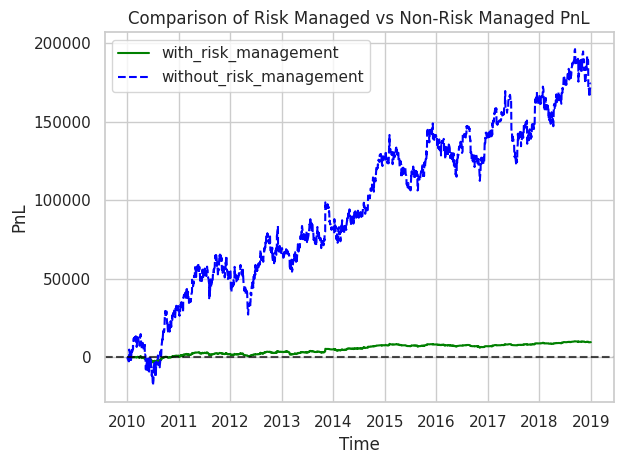

In [58]:
backtest_with_risk_management_single_pair= backtest_with_risk_management(data,port1[0],port1[1],1e5)
backtest_without_risk_management_single_pair=backtest_without_risk_management(data,port1[0],port1[1],1e5)
plt.plot(figsize=(18,6))
plt.plot(backtest_with_risk_management_single_pair, label="with_risk_management", color="green")
plt.plot( backtest_without_risk_management_single_pair, label="without_risk_management", color="blue", linestyle="--")

plt.axhline(0, color="black", linestyle="--", alpha=0.7)
plt.title("Comparison of Risk Managed vs Non-Risk Managed PnL")
plt.xlabel("Time")
plt.ylabel("PnL")
plt.legend()
plt.tight_layout()
plt.show()

Testing out a portfolio of stocks instead of a single pair


Date
2010-01-04         0.00000
2010-01-05         0.00000
2010-01-06         0.00000
2010-01-07         0.00000
2010-01-08         0.00000
                  ...     
2018-12-24   -294628.14751
2018-12-26   -294628.14751
2018-12-27   -294628.14751
2018-12-28   -294628.14751
2018-12-31   -294628.14751
Length: 2264, dtype: float64
Date
2010-01-04    7.158969e+03
2010-01-05    1.683520e+05
2010-01-06    1.054983e+05
2010-01-07   -2.439718e+05
2010-01-08   -1.207380e+05
                  ...     
2018-12-24   -8.726773e+06
2018-12-26   -8.726773e+06
2018-12-27   -8.726773e+06
2018-12-28   -8.726773e+06
2018-12-31   -8.726773e+06
Length: 2264, dtype: float64


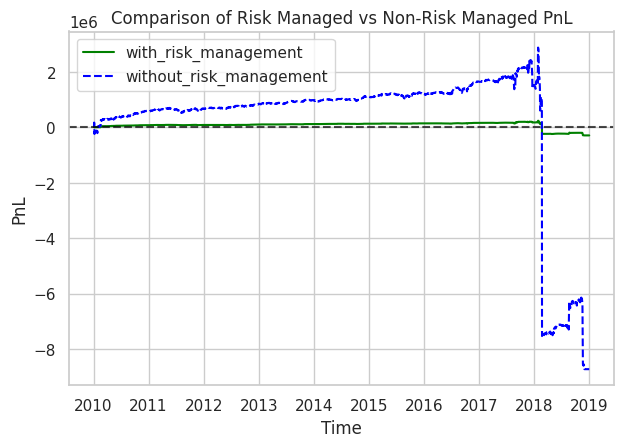

In [62]:
profits_wrm=[]
profits_worm=[]
for pair in port2:


   backtest_wrm_result = backtest_with_risk_management(data,pair[0],pair[1],1e5)
   backtest_worm_result =backtest_without_risk_management(data,pair[0],pair[1],1e5)
   profits_wrm.append(backtest_wrm_result)
   profits_worm.append(backtest_worm_result)
cumulative_wrm= reduce(lambda x, y: x.add(y, fill_value=0), profits_wrm)
cumulative_worm= reduce(lambda x, y: x.add(y, fill_value=0), profits_worm)
cumulative_wrm.replace([np.inf, -np.inf], np.nan, inplace=True)
cumulative_worm.replace([np.inf, -np.inf], np.nan, inplace=True)
cumulative_wrm.fillna(method='ffill', inplace=True)
cumulative_worm.fillna(method='ffill', inplace=True)
print(cumulative_wrm)
print(cumulative_worm)
plt.plot(figsize=(18,6))

plt.plot(cumulative_wrm, label="with_risk_management", color="green")
plt.plot(cumulative_worm, label="without_risk_management", color="blue", linestyle="--")

plt.axhline(0, color="black", linestyle="--", alpha=0.7)
plt.title("Comparison of Risk Managed vs Non-Risk Managed PnL")
plt.xlabel("Time")
plt.ylabel("PnL")
plt.legend()
plt.tight_layout()
plt.show()



As we can see the risk management help's minimize our losses


But our portfolio shoudn't have such a bad performnace on further investigaiton I found out it was the second stock pair of 'ADI' and 'SNPS' which was responsible for the bulk of the losses

Date
2010-01-04        0.000000
2010-01-05        0.000000
2010-01-06        0.000000
2010-01-07        0.000000
2010-01-08        0.000000
                  ...     
2018-12-24    97419.038391
2018-12-26    97514.900448
2018-12-27    97540.953898
2018-12-28    97548.762715
2018-12-31    97548.762715
Length: 2264, dtype: float64
Date
2010-01-04    5.642161e+03
2010-01-05    1.670486e+05
2010-01-06    1.062270e+05
2010-01-07   -2.434614e+05
2010-01-08   -1.203365e+05
                  ...     
2018-12-24    1.158181e+06
2018-12-26    1.162720e+06
2018-12-27    1.166339e+06
2018-12-28    1.168234e+06
2018-12-31    1.168234e+06
Length: 2264, dtype: float64


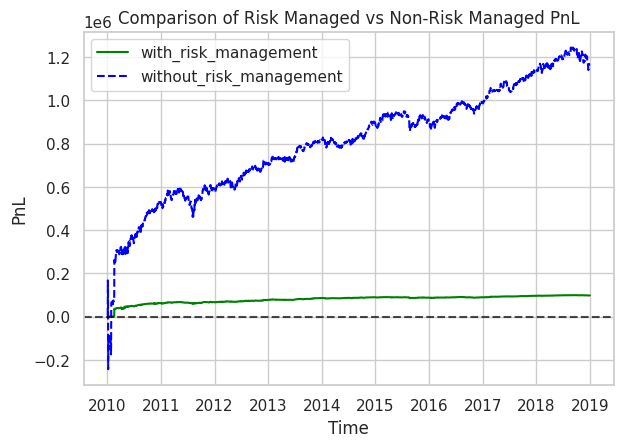

In [66]:
profits_wrm=[]
profits_worm=[]
for pair in port2:

   if pair[0]=='ADI' and pair[1]=='SNPS':
     continue
   else:
    backtest_wrm_result = backtest_with_risk_management(data,pair[0],pair[1],1e5)
    backtest_worm_result =backtest_without_risk_management(data,pair[0],pair[1],1e5)
    profits_wrm.append(backtest_wrm_result)
    profits_worm.append(backtest_worm_result)
cumulative_wrm= reduce(lambda x, y: x.add(y, fill_value=0), profits_wrm)
cumulative_worm= reduce(lambda x, y: x.add(y, fill_value=0), profits_worm)
cumulative_wrm.replace([np.inf, -np.inf], np.nan, inplace=True)
cumulative_worm.replace([np.inf, -np.inf], np.nan, inplace=True)
cumulative_wrm.fillna(method='ffill', inplace=True)
cumulative_worm.fillna(method='ffill', inplace=True)
print(cumulative_wrm)
print(cumulative_worm)
plt.plot(figsize=(18,6))

plt.plot(cumulative_wrm, label="with_risk_management", color="green")
plt.plot(cumulative_worm, label="without_risk_management", color="blue", linestyle="--")

plt.axhline(0, color="black", linestyle="--", alpha=0.7)
plt.title("Profits without the second pair")
plt.xlabel("Time")
plt.ylabel("PnL")
plt.legend()
plt.tight_layout()
plt.show()


This is the profit without the pair of ADI and SNPS

In [76]:
start=datetime.datetime(2018,1,1)
end=datetime.datetime(2019,1,1)
tickers = [
    'ADI','SNPS'
]

data=yf.download(tickers,start,end)['Close']
data.dropna(axis=1,how='any',inplace=True)
data.tail()

[*********************100%***********************]  2 of 2 completed


Ticker,ADI,SNPS
Date,,
2018-12-24,80.419998,79.239998
2018-12-26,84.339996,82.790001
2018-12-27,85.360001,83.239998
2018-12-28,85.459999,83.639999
2018-12-31,85.830002,84.239998


In [77]:
print(coint(data['ADI'],data['SNPS']))

(-2.19199138197466, 0.4284971566294479, array([-3.94078403, -3.36067957, -3.06145832]))


As we can see this is because in the year 2018 this particular pair of stock has an high p_value and is cointegerated no more
